In [1]:
import matplotlib.pyplot as plt
import cv2
import os

from text_classification.text_classifier import TextClassifier

/Users/anastasiabogatenkova/miniconda3/envs/doc/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
clf = TextClassifier(on_gpu=False, checkpoint_path="../saved_models/text_classifier_resnet18.pth", config={})

In [3]:
data_dir = "../data/classification_data"

test = []
pred = []

wrong_files = []

for img_name in os.listdir(data_dir):
    if not img_name.endswith("png"):
        continue
    test.append(img_name.split("_")[0])
    img = cv2.imread(os.path.join(data_dir, img_name))
    res = clf.predict(img)
    if res != test[-1]:
        wrong_files.append(img_name)
    pred.append(res)

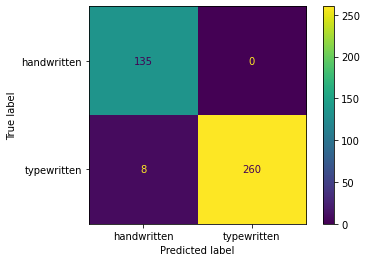

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(test, pred, labels=clf.classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes)
disp.plot()
plt.show()

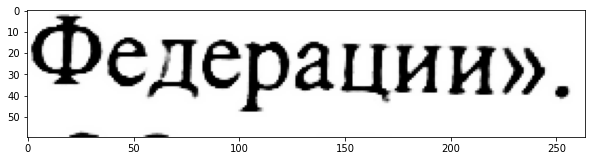

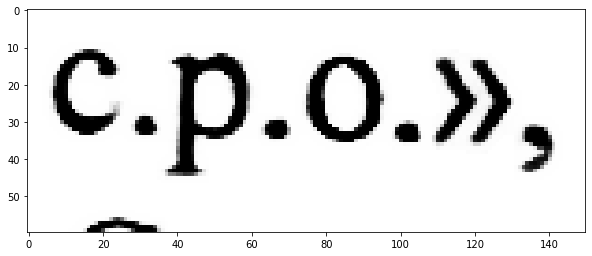

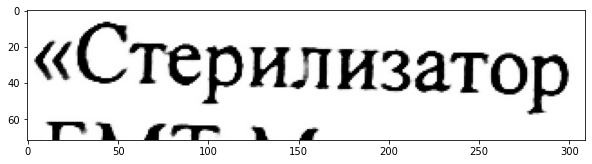

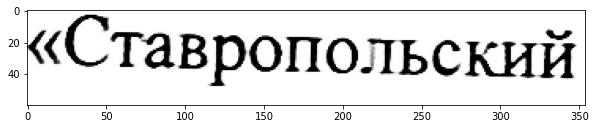

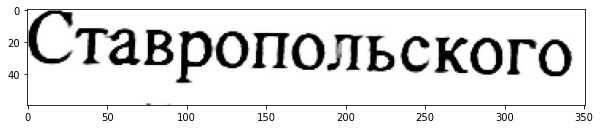

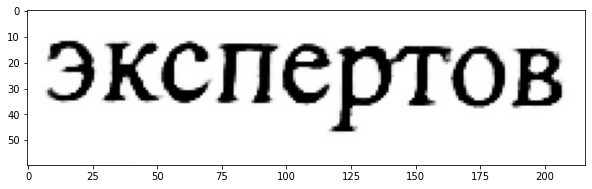

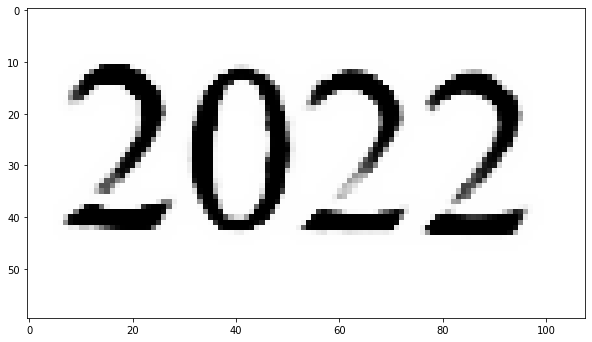

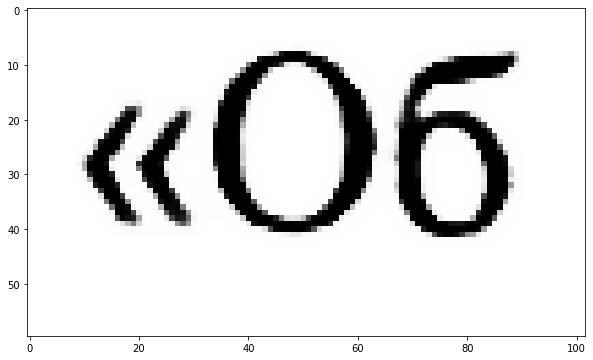

In [5]:
for file_name in wrong_files:
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.imread(os.path.join(data_dir, file_name)))